In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
file_to_load = "C:\\Users\\joyce\\Documents\\StudentsPerformance.csv"

In [3]:
ny_df= pd.read_csv(file_to_load)

In [4]:
ny_df.head(10)
          

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


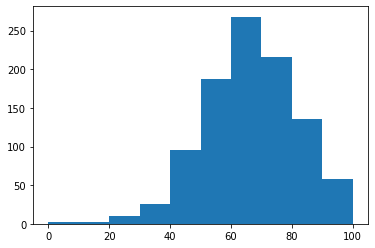

In [6]:
plt.hist( ny_df['math score'])
plt.show()

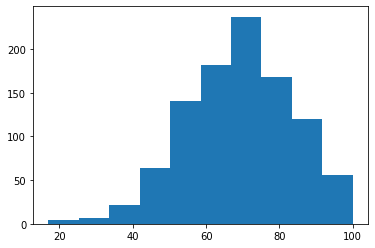

In [7]:
plt.hist( ny_df['reading score'])
plt.show()

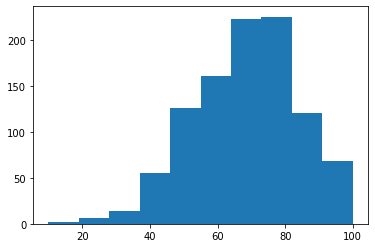

In [8]:
plt.hist( ny_df['writing score'])
plt.show()

In [9]:
ny_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
median1 = ny_df['math score'].median()
median1

66.0

In [11]:
median2 = ny_df['reading score'].median()
median2

70.0

In [12]:
median3 = ny_df['writing score'].median()
median3

69.0

In [13]:
ny_df.groupby(['math score']).nunique()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
math score,,,,,,,,
0,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1
18,1,1,1,1,1,1,1,1
19,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1
23,1,1,1,1,1,1,1,1
24,1,1,1,1,1,1,1,1
26,1,1,1,1,1,1,1,1
27,2,2,2,1,1,1,1,2


In [14]:
ny_df.groupby(['parental level of education']).count()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
parental level of education,,,,,,,
associate's degree,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179


In [15]:
mean_scores = ny_df.groupby(['parental level of education','lunch','test preparation course'],as_index=False).mean()
mean_scores

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000
2,associate's degree,standard,completed,73.660377,77.735849,78.735849
3,associate's degree,standard,none,68.967391,69.750000,68.043478
4,bachelor's degree,free/reduced,completed,66.764706,73.823529,75.705882
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148
6,bachelor's degree,standard,completed,77.103448,78.448276,80.448276
7,bachelor's degree,standard,none,70.666667,73.466667,72.888889
8,high school,free/reduced,completed,60.000000,65.458333,65.541667
9,high school,free/reduced,none,51.652174,57.478261,53.152174


In [66]:
mean_scores['combined scores'] = (mean_scores['math score'] + mean_scores['reading score'] + mean_scores['writing score']) / 3

In [67]:
mean_scores

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345,71.701149
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000,61.638889
2,associate's degree,standard,completed,73.660377,77.735849,78.735849,76.710692
3,associate's degree,standard,none,68.967391,69.750000,68.043478,68.920290
4,bachelor's degree,free/reduced,completed,66.764706,73.823529,75.705882,72.098039
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148,63.876543
6,bachelor's degree,standard,completed,77.103448,78.448276,80.448276,78.666667
7,bachelor's degree,standard,none,70.666667,73.466667,72.888889,72.340741
8,high school,free/reduced,completed,60.000000,65.458333,65.541667,63.666667
9,high school,free/reduced,none,51.652174,57.478261,53.152174,54.094203


In [68]:
advantaged_df = mean_scores[(mean_scores['parental level of education'].isin(["bachelor's degree" ,"master's degree"])) & (mean_scores['lunch'].isin(['standard'])) & (mean_scores['test preparation course'].isin(['completed']))]

                    

In [19]:
advantaged_df

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
6,bachelor's degree,standard,completed,77.103448,78.448276,80.448276,78.666667
14,master's degree,standard,completed,78.000000,84.375000,85.500000,82.625000


In [69]:
disadvantaged_df = mean_scores[(mean_scores['parental level of education'].isin(['high school' ,'some high school', 'some college', "associate's degree"])) & (mean_scores['lunch'].isin(['standard','free/reduced'])) & (mean_scores['test preparation course'].isin(['completed','none']))]

In [70]:
disadvantaged_df

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345,71.701149
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000,61.638889
2,associate's degree,standard,completed,73.660377,77.735849,78.735849,76.710692
3,associate's degree,standard,none,68.967391,69.750000,68.043478,68.920290
8,high school,free/reduced,completed,60.000000,65.458333,65.541667,63.666667
9,high school,free/reduced,none,51.652174,57.478261,53.152174,54.094203
10,high school,standard,completed,68.750000,69.625000,69.937500,69.437500
11,high school,standard,none,65.563830,66.372340,63.659574,65.198582
16,some college,free/reduced,completed,60.730769,68.961538,69.384615,66.358974
17,some college,free/reduced,none,59.830189,63.169811,60.924528,61.308176


In [73]:
bachelor_population = ny_df[(ny_df['parental level of education'] == 'bachelor\'s degree') & (ny_df.lunch == "standard") & 
      (ny_df['test preparation course'] == 'completed')]

master_populaton = ny_df[(ny_df['parental level of education'] == 'master\'s degree') & (ny_df.lunch == "standard") & 
      (ny_df['test preparation course'] == 'completed')]
combine_advantage_population =[bachelor_population,master_populaton]
advantage_population = pd.concat(combine_advantage_population)


In [90]:
advantage_population['Combined Scores'] = (advantage_population['math score'] + advantage_population['reading score'] + advantage_population['writing score']) / 3
round(advantage_population,2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
77,male,group A,bachelor's degree,standard,completed,80,78,81,79.67
101,male,group D,bachelor's degree,standard,completed,68,74,74,72.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.67
120,female,group C,bachelor's degree,standard,completed,79,92,89,86.67
148,female,group D,bachelor's degree,standard,completed,68,75,81,74.67
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.67
234,male,group C,bachelor's degree,standard,completed,83,82,84,83.00
312,male,group D,bachelor's degree,standard,completed,67,61,68,65.33
314,female,group C,bachelor's degree,standard,completed,59,64,75,66.00
347,female,group C,bachelor's degree,standard,completed,77,94,95,88.67


In [91]:
no_advantage_population = ny_df[(ny_df['parental level of education'].isin(['high school' ,'some high school', 'some college', "associate's degree"])) & (ny_df['lunch'].isin(['standard','free/reduced'])) & (ny_df['test preparation course'].isin(['completed','none']))]
no_advantage_population

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43


In [92]:
no_advantage_population['Combined Scores'] = (no_advantage_population['math score'] + no_advantage_population['reading score'] + no_advantage_population['writing score']) / 3
round(no_advantage_population,2)

C:\Users\joyce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
1,female,group C,some college,standard,completed,69,90,88,82.33
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
5,female,group B,associate's degree,standard,none,71,83,78,77.33
6,female,group B,some college,standard,completed,88,95,92,91.67
7,male,group B,some college,free/reduced,none,40,43,39,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,65.00
9,female,group B,high school,free/reduced,none,38,60,50,49.33
10,male,group C,associate's degree,standard,none,58,54,52,54.67
11,male,group D,associate's degree,standard,none,40,52,43,45.00


In [95]:
sample1 = advantaged_df['combined scores']


In [24]:
sample2 = disadvantaged_df['combined scores']


In [96]:
combine_sample1 = advantage_population['Combined Scores']

In [97]:
combine_sample2 = no_advantage_population['Combined Scores']

In [25]:
t2, p2 = stats.ttest_ind(sample1, sample2)
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.832838577827705
p = 0.011999426437232466


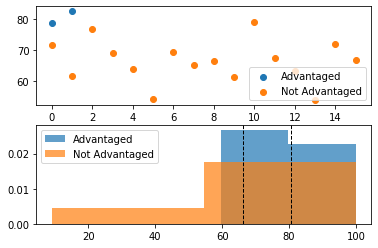

In [98]:
def gendata(loc1=0, loc2=0):
    sample1 = advantaged_df['combined scores']
    sample2 = disadvantaged_df['combined scores']
    
plt.subplot(2, 1, 1)
plt.scatter(range(len(sample1)), sample1, label="Advantaged")
plt.scatter(range(len(sample2)), sample2, label="Not Advantaged")
plt.legend()

plt.subplot(2, 1, 2)

plt.hist(combine_sample1, 2, density=True, alpha=0.7, label="Advantaged")
plt.hist(combine_sample2, 2, density=True, alpha=0.7, label="Not Advantaged")
plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()

#return sample1, sample2

